<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab2_Discrete_Fourier_Transform/Lab2_Discrete_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fourier coeffs (N = 7):
 [-7.07355303e-02+3.09663441e-17j  4.00588355e-17+5.50910005e-18j
 -6.36619772e-01-4.76836708e-17j  2.99114549e-17+0.00000000e+00j
 -6.36619772e-01+4.76836708e-17j  4.00588355e-17-5.50910005e-18j
 -7.07355303e-02-3.09663441e-17j] 



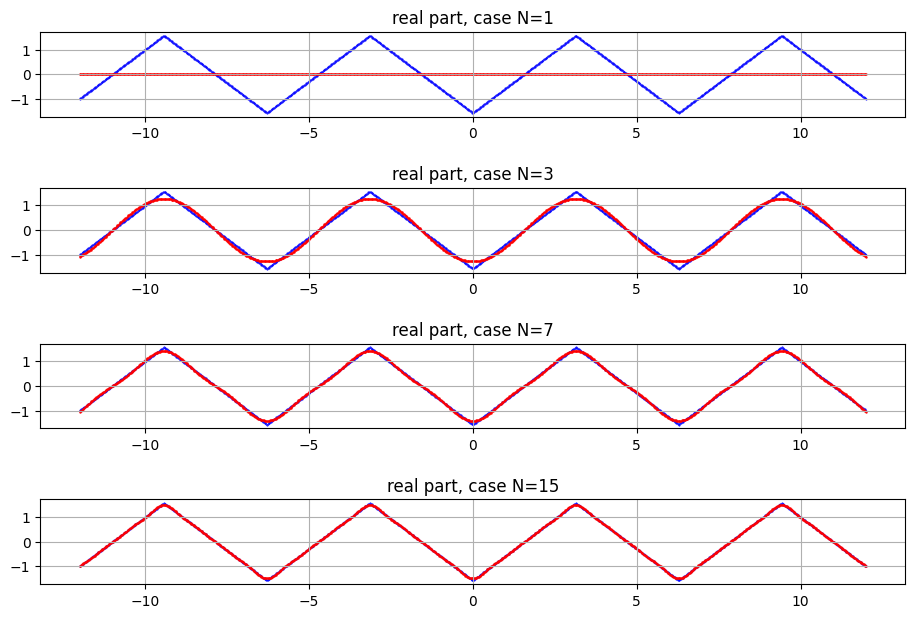

In [79]:
# @title 1. Представить в виде ряда Фурье периодическую функцию

import numpy as np
import scipy.integrate as spi
from scipy import fftpack
import matplotlib.pyplot as plt

# f(x) = { pi/2 + x, (-pi < x < 0 ),
#        { pi/2 - x, (  0 < x < pi).

# Исходные данные

f = lambda x: (np.pi/2 + ((x % T) - T/2.) if (-np.pi < ((x % T) - T/2.) and ((x % T) - T/2.) < 0) else np.pi/2 - ((x % T) - T/2.))

T = 2 * np.pi
x1 = -12    # Нижняя граница области определения функции
x2 = 12     # Верхняя граница области определения функции
Nx = 1000   # Дискретизация по оси X

# Ось X
x_range = np.linspace(x1, x2, Nx)

# Эталонные кривые исходной функции f(x)
# y_true = f(x_range)
y_true = []
for i in range (len(x_range)):
 y_true.append(f(x_range[i]))

y_true_real = [y.real for y in y_true]
y_true_imag = [y.imag for y in y_true]

# # График функции f(x)
# plt.plot(x_range, y_true)
# plt.grid()
# plt.show()

# Расчет интеграла от комплексной функции
def integral_complex(func, a, b, **kwargs):
  def real_func(x):
    return np.real(func(x))
  def imag_func(x):
    return np.imag(func(x))
  real_integral = spi.quad(real_func, a, b, **kwargs)
  imag_integral = spi.quad(imag_func, a, b, **kwargs)
  integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:], a, b)
  # print(integral)
  # print(imag_integral[1:])
  return integral

# Вычисление коэффициентов ряда Фурье c[-N/2],.., c[0], .., c[N/2-1] (всего N)
def fourier_coeffs(func, N):
  result = []
  N1 = -int(N/2)
  N2 = int((N-1)/2)
  for k in range(N1, N2+1):
    ck = (1./T) * integral_complex(lambda x: func(x) * np.exp(-1j * 2 * np.pi * k * x / T), -T/2, T/2)[0]
    result.append(ck)
  return np.array(result)

# Аппроксимация (восстановление) функции f(x) при помощи коэффициентов c[k]
def fourier_fit(x, c):
  result = 0. + 0.j
  N = len(c)
  N1 = -int(N/2)
  N2 = int((N-1)/2)
  for k in range(N1, N2+1):
    result += c[k+int(N/2)] * np.exp(1j * 2. * np.pi * k * x / T)
  return result

# 1.1 Вычислить коэффициенты ряда Фурье для периодической функции f(x).
# 1.2 Аппроксимировать функцию, представленную в виде ряда Фурье.
# 1.3 Изобразить на графике исходную и аппроксимированную функции. Длянаглядности изобразить несколько периодов.
# 1.4 Изобразить несколько вариантов аппроксимации при различных N (количествогармоник).
N_all = [1, 3, 7, 15]
C = fourier_coeffs(f, 7)
print('Fourier coeffs (N = 7):\n', C, '\n')
fig, axs = plt.subplots(len(N_all), 1, figsize=(10, 7))
# fig, axs = plt.subplots(len(N_all), 2, figsize=(10, 7))   # all what commented below is for Imm
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
row = 0
for N in N_all:
  C = fourier_coeffs(f, N)
  y_approx = fourier_fit(x_range, C)
  y_approx_real = [y.real for y in y_approx]
  y_approx_imag = [y.imag for y in y_approx]
  axs[row].set_title('real part, case N=' + str(N))
  # axs[row, 1].set_title('imag part, case N=' + str(N))
  axs[row].grid(True)
  # axs[row, 1].grid(True)
  axs[row].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
  axs[row].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
  # axs[row, 1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
  # axs[row, 1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
  row += 1
plt.show()

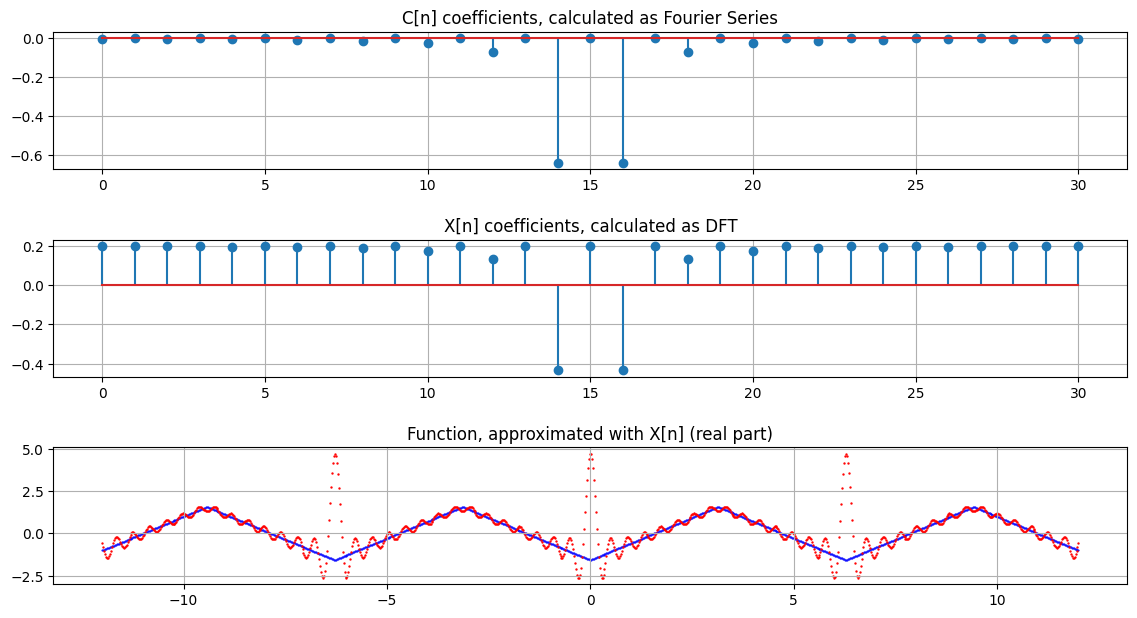

In [80]:
# @title 1.5 Найти коэффициенты ряда Фурье методом ДПФ. Изобразить на графике исходную и аппроксимированную функции.
# Количество коэффициентов
N_dft = 31
# Расчет коэффициентов ряда Фурье
cn = fourier_coeffs(f, N_dft)
# Определение функции f(x) на одном периоде (от 0 до T)
x_period = np.arange(0, T, T/N_dft)
fx = []
for i in range(len(x_period)):
  fx.append(f(x_period[i]))

# Расчет коэффиценотов методом ДПФ
X = fftpack.fft(fx) / N_dft
X = np.roll(X, int(N_dft/2))

# Аппроксимация функции f(x) новым набором коэффициентов
y_approx = fourier_fit(x_range, X)
y_approx_real = [y.real for y in y_approx]
y_approx_imag = [y.imag for y in y_approx]

# Отображение результатов
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 7))
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
axes[0].stem(np.real(cn))
axes[0].grid(True)
axes[0].set_title('C[n] coefficients, calculated as Fourier Series')
axes[1].stem(np.real(X))
axes[1].grid(True)
axes[1].set_title('X[n] coefficients, calculated as DFT')
axes[2].scatter(x_range, y_true_real, color='blue', s=1, marker='.')
axes[2].scatter(x_range, y_approx_real, color='red', s=2, marker='.')
axes[2].set_title('Function, approximated with X[n] (real part)')
# axes[1,1].scatter(x_range, y_true_imag, color='blue', s=1, marker='.')
# axes[1,1].scatter(x_range, y_approx_imag, color='red', s=2, marker='.')
# axes[1,1].set_title('Function, approximated with X[n] (imag part)')
axes[2].grid(True)
# axes[1,1].grid(True)
plt.show()

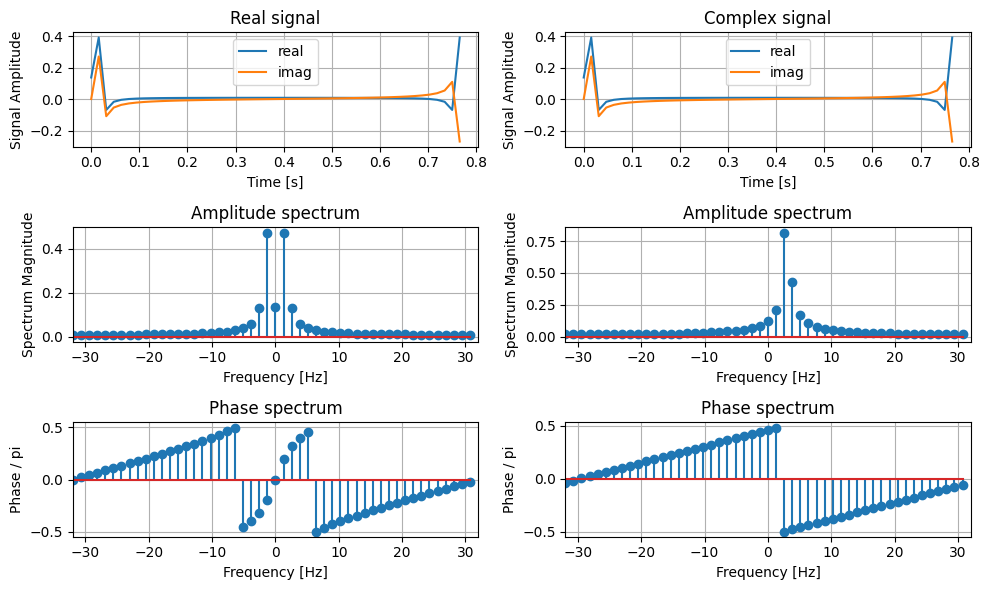

In [81]:
# @title 2. Амплитудный и фазовый спектры действиетльногогармонического сигнала
from matplotlib import pyplot as plt
from scipy import fftpack
import numpy as np

var = 12
NPC = 3 #номер пк

Amp1 = var % 4                    # Ампилитуда сигнала 1
Amp2 = (var+1) % 4                # Ампилитуда сигнала 2

f01 = var                       # Частота гармонического сигнала 1
f02 = NPC                       # Частота гармонического сигнала 2

phi01 = 3 * np.pi / 4           # Начальная фаза гармонического сигнала 1
phi02 = 2 * np.pi / var         # Начальная фаза гармонического сигнала 2

fs = 64                         # Частота дискретизации, Гц
T = 1/fs                        # Период дискретизации, сек
tao = 1                         # Длительность сигнала, сек
Anoise = 2 + var % 4            # Амплитуда шума
K = 0.25 * (1 + var % 8)        # Коэффициент усиления
N = 50                          # Размер ДПФ (количество гармоник)

# 2.1 Сформировать два синусоидальных (гармонических) сигнала с амплитудами A1 и A2, частотами f01 и f02, начальными фазами phi01 и phi02. Сформировать сумму этих сигналов.
# 2.2 Для суммы этих сигналов требуется вычислить ДПФ. Количество точек ДПФ взять равным количеству точек во входном сигнале. Рассчитать амплитудный и фазовый спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.

def plot_signal(x_re, A_re, P_re, x_im, A_im, P_im):
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 6))
  x = x_re
  A = A_re
  P = P_re
  Title = 'Real signal'
  axes[0, 0].plot(t, np.real(x), label='real')
  axes[0, 0].plot(t, np.imag(x), label='imag')
  axes[0, 0].grid(True)
  axes[0, 0].set_xlabel('Time [s]')
  axes[0, 0].set_ylabel('Signal Amplitude')
  axes[0, 0].legend()
  axes[0, 0].title.set_text(Title)
  axes[1, 0].stem(f, A)
  axes[1, 0].grid(True)
  axes[1, 0].set_xlabel('Frequency [Hz]')
  axes[1, 0].set_ylabel('Spectrum Magnitude')
  axes[1, 0].set_xlim(-fs/2, fs/2)
  axes[1, 0].title.set_text('Amplitude spectrum')
  axes[2, 0].stem(f, P / np.pi)
  axes[2, 0].grid(True)
  axes[2, 0].set_xlabel('Frequency [Hz]')
  axes[2, 0].set_ylabel('Phase / pi')
  axes[2, 0].set_xlim(-fs/2, fs/2)
  axes[2, 0].title.set_text('Phase spectrum')
  x = x_re
  A = A_im
  P = P_im
  Title = 'Complex signal'
  axes[0, 1].plot(t, np.real(x), label='real')
  axes[0, 1].plot(t, np.imag(x), label='imag')
  axes[0, 1].grid(True)
  axes[0, 1].set_xlabel('Time [s]')
  axes[0, 1].set_ylabel('Signal Amplitude')
  axes[0, 1].legend()
  axes[0, 1].title.set_text(Title)
  axes[1, 1].stem(f, A)
  axes[1, 1].grid(True)
  axes[1, 1].set_xlabel('Frequency [Hz]')
  axes[1, 1].set_ylabel('Spectrum Magnitude')
  axes[1, 1].set_xlim(-fs/2, fs/2)
  axes[1, 1].title.set_text('Amplitude spectrum')
  axes[2, 1].stem(f, P / np.pi)
  axes[2, 1].grid(True)
  axes[2, 1].set_xlabel('Frequency [Hz]')
  axes[2, 1].set_ylabel('Phase / pi')
  axes[2, 1].set_xlim(-fs/2, fs/2)
  axes[2, 1].title.set_text('Phase spectrum')
  fig.tight_layout()
  plt.show()

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация сигнала 1 и 2 (Re + Im)
x1_re = Amp1 * np.cos(2 * np.pi * f01 * t * phi01)
x1_im = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))

x2_re = Amp2 * np.cos(2 * np.pi * f02 * t * phi02)
x2_im = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))

# Сумма сигналов
x_re = x1_re + x2_re
x_im = x1_im + x2_im

# Дискретное преобразование Фурье
X_re = fftpack.fft(x_re) / N
X_im = fftpack.fft(x_im) / N

# Амплитудный и фазовый частотный спектры
A_re = np.abs(X_re)
A_im = np.abs(X_im)

P_re = np.arctan(np.imag(X_re) / (np.real(X_re)+1e-6))
P_im = np.arctan(np.imag(X_im) / (np.real(X_im)+1e-6))

# Отображение группами (subplot)
plot_signal(X_re, A_re, P_re, X_im, A_im, P_im)

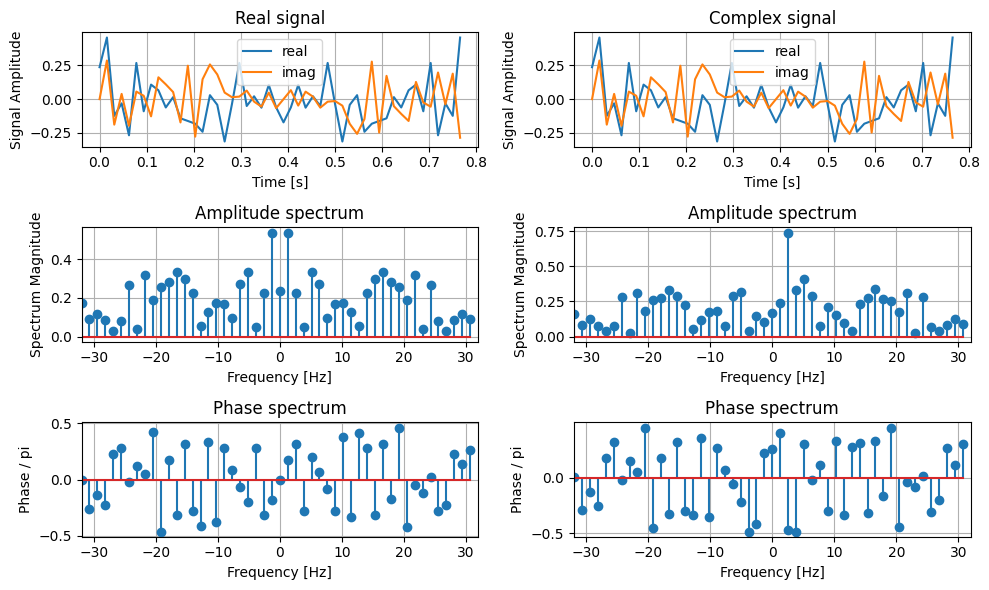

In [82]:
# @title 2.3 Добавить к сумме сигналов шум амплитудой. Рассчитать спектры сигнала, изобразитьих на графиках, проанализировать полученные результаты.
import random
random.seed(323)

# Генерация шума амплитуды Anoise
noise = np.linspace(0, N * T, N, endpoint = False)
for i in range(0, len(noise)):
  noise[i]= random.randint(-Anoise, Anoise)

# Добавление шума к сумме сигналов 1 и 2
noised_x_re = np.add(x_re, noise)
noised_x_im = np.add(x_im, noise)
# print(noised_x_re)
# print(noised_x_im)

noised_X_re = fftpack.fft(noised_x_re) / N
noised_X_im = fftpack.fft(noised_x_im) / N

# Амплитудный и фазовый частотный спектры
noised_A_re = np.abs(noised_X_re)
noised_A_im = np.abs(noised_X_im)

noised_P_re = np.arctan(np.imag(noised_X_re) / (np.real(noised_X_re)+1e-6))
noised_P_im = np.arctan(np.imag(noised_X_im) / (np.real(noised_X_im)+1e-6))

# Отображение группами (subplot)
plot_signal(noised_X_re, noised_A_re, noised_P_re, noised_X_im, noised_A_im, noised_P_im)

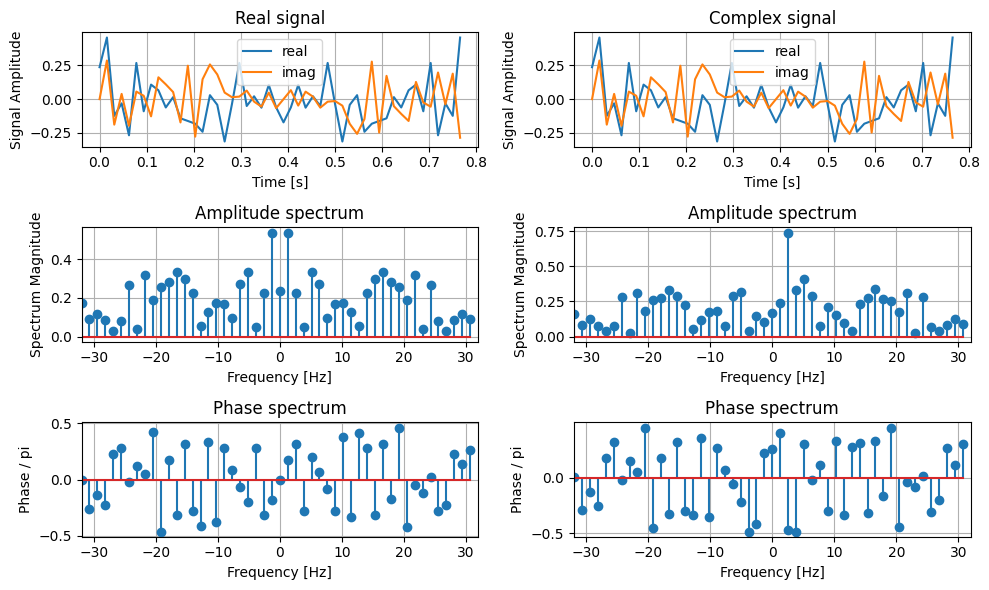

In [83]:
# @title 2.4 Добавить к полученному на этапе 3 сигналу константу, равную K*A1. Рассчитать спектры сигнала, изобразить их на графиках, проанализировать полученные результаты.

# Добавление K*A1, K*A2 к сумме сигналов 1 и 2
tmp_list = len(noised_x_re) * [K*Amp1]
noised_x_re_2 = np.add(noised_x_re, tmp_list)
noised_x_im_2 = np.add(noised_x_im, tmp_list)
noised_X_re_2 = fftpack.fft(noised_x_re_2) / N
noised_X_im_2 = fftpack.fft(noised_x_im) / N

# Амплитудный и фазовый частотный спектры
noised_A_re_2 = np.abs(noised_X_re_2)
noised_A_im_2 = np.abs(noised_X_im_2)

noised_P_re_2 = np.arctan(np.imag(noised_X_re_2) / (np.real(noised_X_re_2)+1e-6))
noised_P_im_2 = np.arctan(np.imag(noised_X_im_2) / (np.real(noised_X_im_2)+1e-6))

# Отображение группами (subplot)
plot_signal(noised_X_re_2, noised_A_re_2, noised_P_re_2, noised_X_im_2, noised_A_im_2, noised_P_im_2)

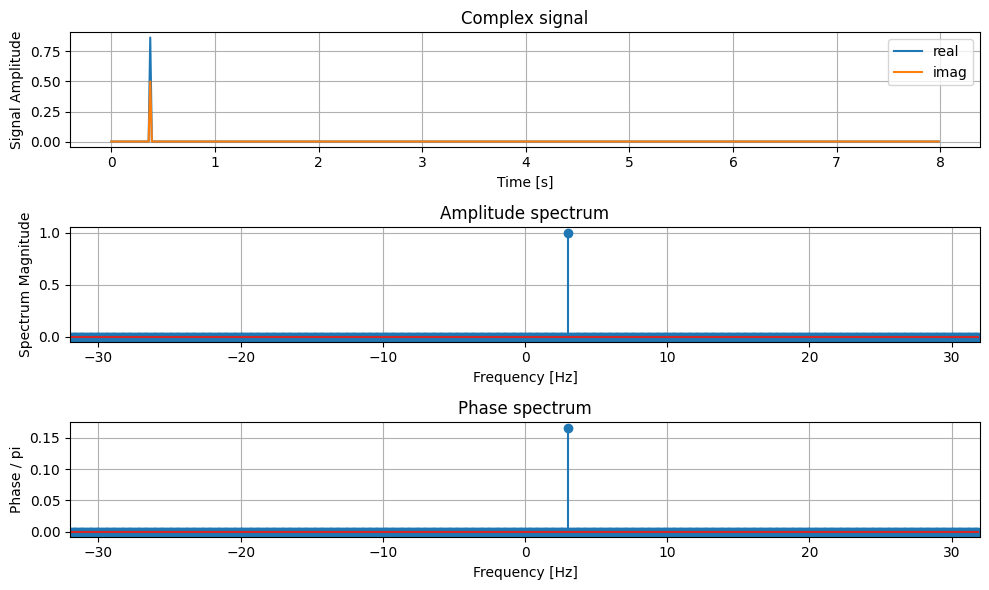

In [84]:
# @title 2.5 Для сигнала, полученного на этапе 1, вычислить ДПФ с количеством точек, равным 512. Рассчитать спектры сигнала, изобразить их на графиках,проанализировать полученные результаты.
N = 512

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs

# Генерация действительного и комплексного гармонического сигнала
x1_cmp = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
x2_cmp = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))

x_cmp = x1_cmp + x2_cmp

# Дискретное преобразование Фурье
X_cmp = fftpack.fft(x_cmp) / N


# Амплитудный и фазовый частотный спектры
A_cmp = np.abs(X_cmp);
P_cmp = np.arctan(np.imag(X_cmp) / (np.real(X_cmp)+1e-6));

# Отображение группами (subplot)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))

x = X_cmp
A = A_cmp
P = P_cmp

Title = 'Complex signal'
axes[0].plot(t, np.real(x), label='real')
axes[0].plot(t, np.imag(x), label='imag')
axes[0].grid(True)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Signal Amplitude')
axes[0].legend()
axes[0].title.set_text(Title)
axes[1].stem(f, A)
axes[1].grid(True)
axes[1].set_xlabel('Frequency [Hz]')
axes[1].set_ylabel('Spectrum Magnitude')
axes[1].set_xlim(-fs/2, fs/2)
axes[1].title.set_text('Amplitude spectrum')
axes[2].stem(f, P / np.pi)
axes[2].grid(True)
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Phase / pi')
axes[2].set_xlim(-fs/2, fs/2)
axes[2].title.set_text('Phase spectrum')

fig.tight_layout()
plt.show()

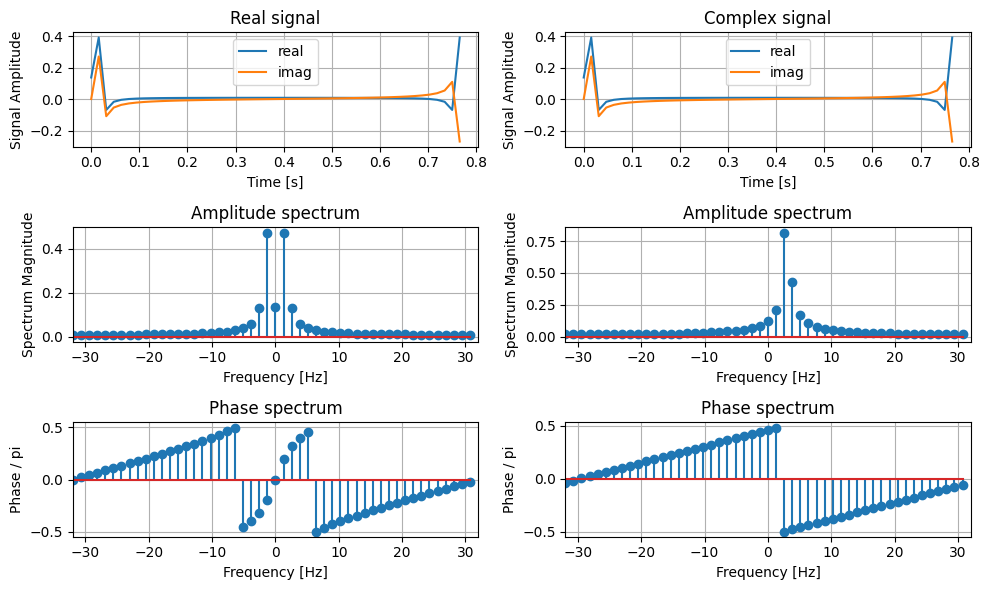

In [123]:
# @title ДОП: Написать функцию, реализующую вычислительный граф БПФ. Выполнить пункты 1 и 2 из задания 2.2, используя собственную функцию БПФ.
# from math import log
import math
def fft_butterfly(x):
  # i - iterator
  # j - wing number
  # k - jump to next halfwing (step)
  # h - jump  to next wing (step)
  def halfwing_op(up, dn, W=1, thinning=1):
    sum_ = up + dn
    if(thinning): # thinning right
      sub_ = W * (up - dn)
    else:         # thinning left
      sub_ = (up - W * dn)
    return sum_, sub_

  def vector_rotation_operator(angle, k, n, inverse=0):
    if(inverse):
      return complex(cos(angle * k * n), sin( angle) * k * n)
    else:
      return complex(cos(angle * k * n), sin(-angle) * k * n)

  x_cp = x.copy()
  i_lim = int(log(len(x), 2))
  # print("i , j , h , k")
  for i in range(i_lim):
    # print("=============")
    for j in range((2**i )):
      # print("-------------")
      k_lim = int(len(x) / (2**(i+1)))
      h_lim = 2 * k_lim
      for k in range(k_lim):
        # print(i,",", j,",", k,",", k_lim)

        x_cp[j * h_lim + k], x_cp[j * h_lim + k + k_lim] = halfwing_op(x_cp[j * h_lim + k], x_cp[j * h_lim + k + k_lim])
  # print("-------------")
  return x_cp
# xxx = [0, -2, 0, 2, 2, 0, -2, 0, 0, -2, 0, 2, 2, 0, -2, 0]
# res2 = fft_butterfly(xxx)
# print(res2)

Amp1 = var % 4                  # Ампилитуда сигнала 1
Amp2 = (var+1) % 4              # Ампилитуда сигнала 2

f01 = var                       # Частота гармонического сигнала 1
f02 = NPC                       # Частота гармонического сигнала 2

phi01 = 3 * np.pi / 4           # Начальная фаза гармонического сигнала 1
phi02 = 2 * np.pi / var         # Начальная фаза гармонического сигнала 2

fs = 64                         # Частота дискретизации, Гц
T = 1/fs                        # Период дискретизации, сек
tao = 1                         # Длительность сигнала, сек
Anoise = 2 + var % 4            # Амплитуда шума
K = 0.25 * (1 + var % 8)        # Коэффициент усиления
N = 50                          # Размер ДПФ (количество гармоник)

# Оси времени и частоты
t = np.linspace(0, N * T, N, endpoint = False)
f = fftpack.fftfreq(N) * fs
# Генерация сигнала 1 и 2 (Re + Im)
x1_re = Amp1 * np.cos(2 * np.pi * f01 * t * phi01)
x1_im = Amp1 * np.exp(1j * (2 * np.pi * f01 * t + phi01))
x2_re = Amp2 * np.cos(2 * np.pi * f02 * t * phi02)
x2_im = Amp2 * np.exp(1j * (2 * np.pi * f02 * t + phi02))
# Сумма сигналов
x_re = x1_re + x2_re
x_im = x1_im + x2_im
# Дискретное преобразование Фурье
X_re = fftpack.fft(x_re) / N
X_im = fftpack.fft(x_im) / N
# Амплитудный и фазовый частотный спектры
A_re = np.abs(X_re)
A_im = np.abs(X_im)
P_re = np.arctan(np.imag(X_re) / (np.real(X_re)+1e-6))
P_im = np.arctan(np.imag(X_im) / (np.real(X_im)+1e-6))
# Отображение группами (subplot)
plot_signal(X_re, A_re, P_re, X_im, A_im, P_im)

In [118]:
def ButterflyWings(a, b):
    sum = a + b
    sub = a - b
    return sum, sub
def ExecFwht(w):
    r = int(log(len(w), 2))
    dcd_w = w[:]
    for i in range (r):
        for j in range (0, len(w), 2**(i+1)):
            for k in range (2**i):
                dcd_w[j + k], dcd_w[j + 2**i + k] = ButterflyWings(dcd_w[j + k], dcd_w[j + 2**i + k])
    return dcd_w
res1 = ExecFwht(xxx)
print(res1)

[0, 0, 0, 16, 0, 0, -16, 0, 0, 0, 0, 0, 0, 0, 0, 0]
